In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The sav

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 7s 1us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

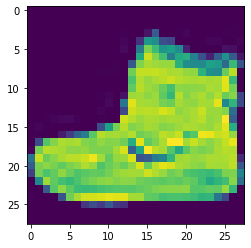

In [8]:
single_image=x_train[0]
plt.imshow(single_image)

In [9]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
x_train.max()

255

In [11]:
x_train.min()

0

In [12]:
x_train=x_train/255
x_test=x_test/255

In [14]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [15]:
x_train=x_train.reshape(60000,28,28,1)

In [16]:
x_test=x_test.reshape(10000, 28, 28,1)

In [17]:
x_train[0].shape

(28, 28, 1)

In [18]:
from tensorflow.keras.utils import to_categorical

In [19]:
y_train.shape

(60000,)

In [20]:
y_test=to_categorical(y_test)
y_train=to_categorical(y_train)

In [21]:
y_test.shape

(10000, 10)

In [22]:
y_train.shape

(60000, 10)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [24]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [26]:
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
early_stop=EarlyStopping(monitor='val_loss',patience=2)

In [28]:
model.fit(x_train,y_train,epochs=15,validation_data=(x_test,y_test),callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 135s 2ms/sample - loss: 0.4101 - accuracy: 0.8537 - val_loss: 0.3292 - val_accuracy: 0.8842
Epoch 2/15
60000/60000 [==============================] - 131s 2ms/sample - loss: 0.2779 - accuracy: 0.8989 - val_loss: 0.3024 - val_accuracy: 0.8868
Epoch 3/15
60000/60000 [==============================] - 131s 2ms/sample - loss: 0.2401 - accuracy: 0.9139 - val_loss: 0.2856 - val_accuracy: 0.8991
Epoch 4/15
60000/60000 [==============================] - 130s 2ms/sample - loss: 0.2158 - accuracy: 0.9227 - val_loss: 0.2811 - val_accuracy: 0.9054
Epoch 5/15
60000/60000 [==============================] - 128s 2ms/sample - loss: 0.1965 - accuracy: 0.9290 - val_loss: 0.3081 - val_accuracy: 0.9007
Epoch 6/15
60000/60000 [==============================] - 128s 2ms/sample - loss: 0.1821 - accuracy: 0.9347 - val_loss: 0.3414 - val_accuracy: 0.9024


In [29]:
metrics=pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.410141,0.853750,0.329158,0.8842
1,0.277931,0.898867,0.302412,0.8868
2,0.240091,0.913850,0.285625,0.8991
3,0.215815,0.922717,0.281111,0.9054
4,0.196519,0.929000,0.308110,0.9007
5,0.182097,0.934700,0.341385,0.9024


<AxesSubplot:>

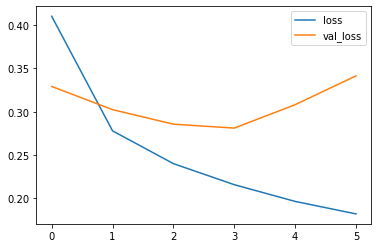

In [30]:
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

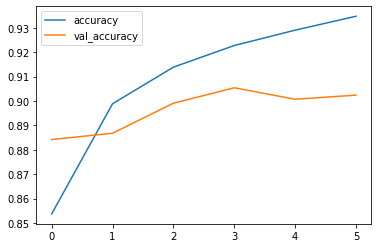

In [31]:
metrics[['accuracy','val_accuracy']].plot()

In [32]:
model.evaluate(x_test,y_test,verbose=0)

[0.341384818354249, 0.9024]

In [33]:
from sklearn.metrics import classification_report,confusion_matrix

In [34]:
predictions=model.predict_classes(x_test)

In [35]:
print(classification_report(y_test,predictions))   #should be y_cat_test

ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets